In [1]:
import matplotlib.pyplot as plt
import numpy as np
import shutil
import cv2
import seaborn


In [5]:
train_list = open( './zero_train.list','r' ).read().strip().split('\n')
train_list = np.array( train_list )
zero_val_list = open( './zero_zero_val.list','r' ).read().strip().split('\n')
zero_val_list = np.array( zero_val_list )
multi_val_list = open( './zero_multi_val.list','r' ).read().strip().split('\n')
multi_val_list = np.array( multi_val_list )

with open('./DatasetA_train_20180813/attributes_per_class_cleaned.txt') as fp:
    label_attribute = {}
    attrs = []
    for line in fp.readlines():
        line = line.strip().split('\t')
        label_attribute[line[0]] =  np.array( line[1:] , np.float32 )
       


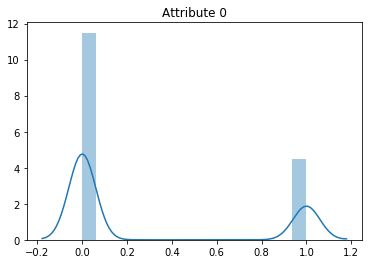

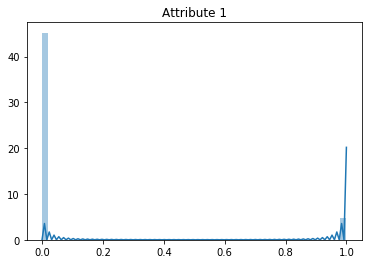

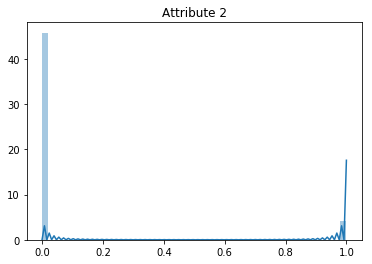

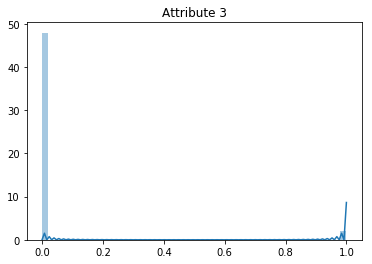

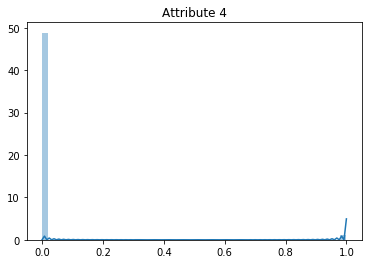

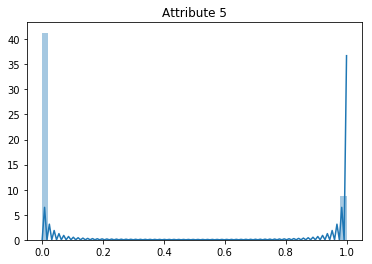

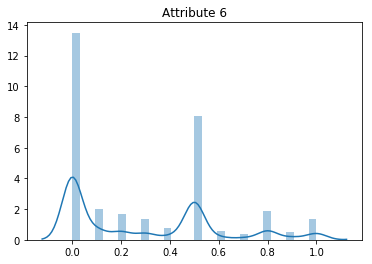

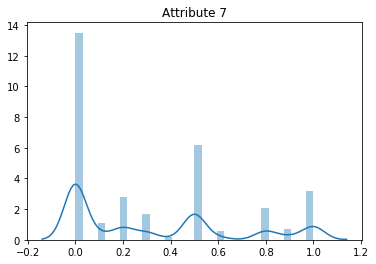

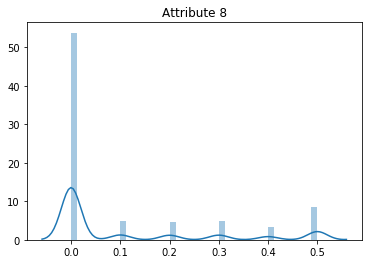

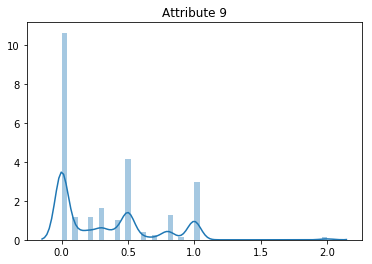

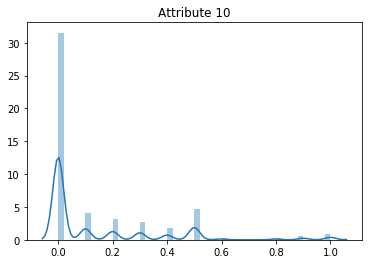

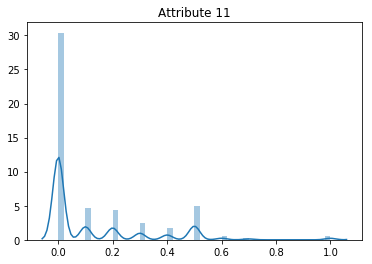

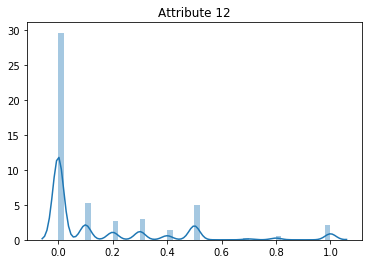

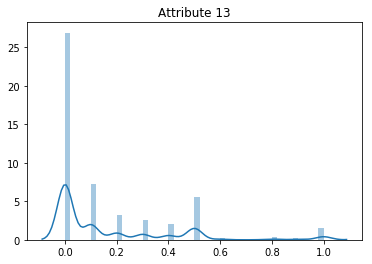

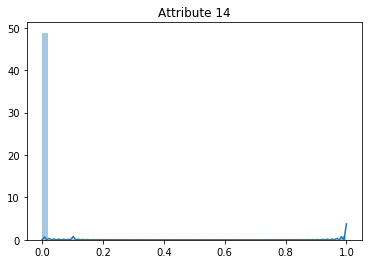

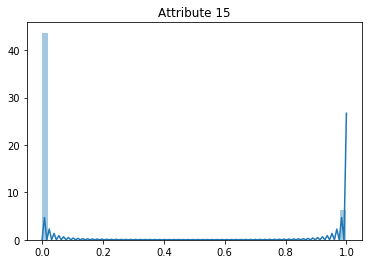

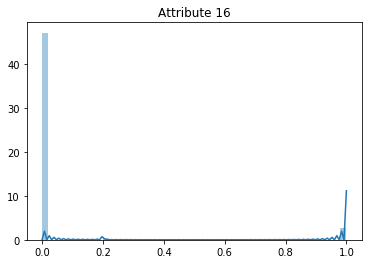

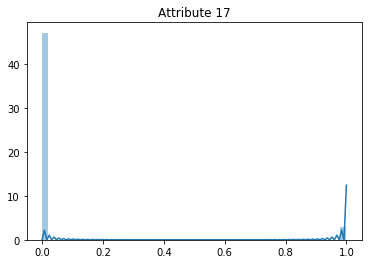

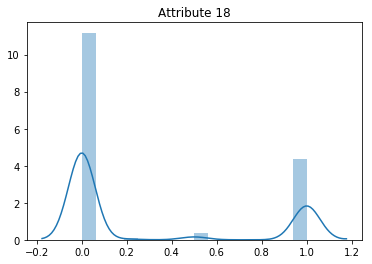

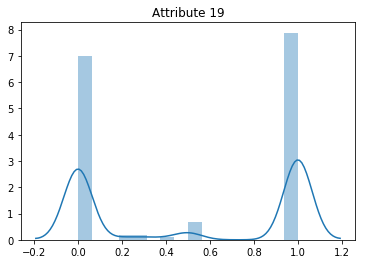

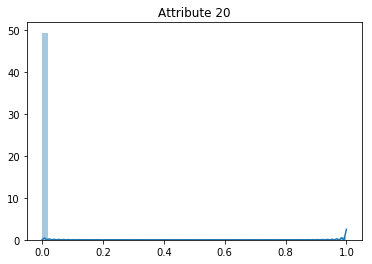

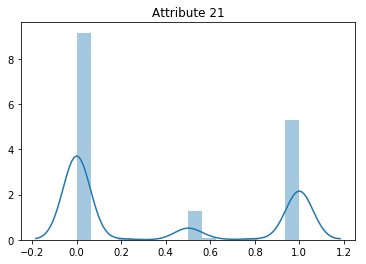

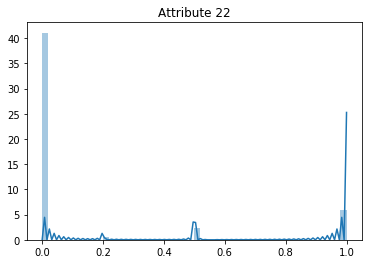

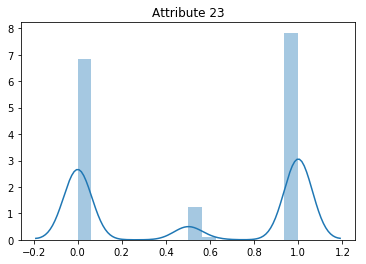

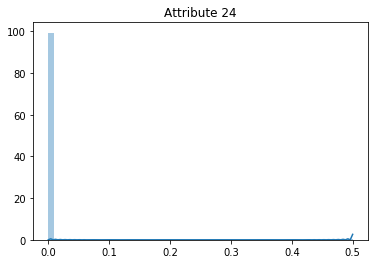

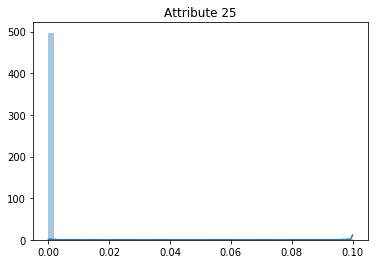

In [10]:
def f(img_list):
    plt.figure()

    attr_list = []
    for line in img_list:
        filename , label = line.split('\t')[0] , line.split('\t')[1]
        t = []
        for i in range(26):
            t.append( label_attribute[ label ][i] )
        attr_list.append( np.array( t , np.float32 ) )
    attr_list = np.array(attr_list)
    for i in range(26):
        plt.figure()
        plt.title('Attribute {}'.format(i))
        seaborn.distplot( attr_list[:,i] )
        plt.show()

f(train_list)

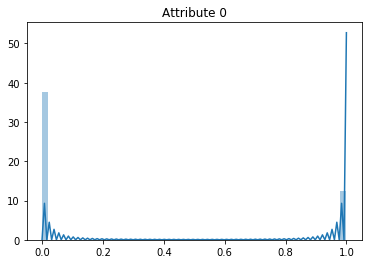

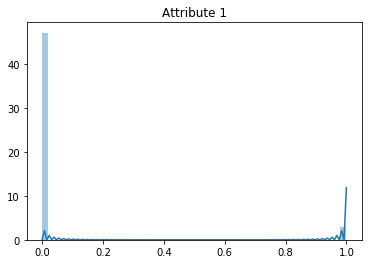

/home/wtw/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/wtw/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


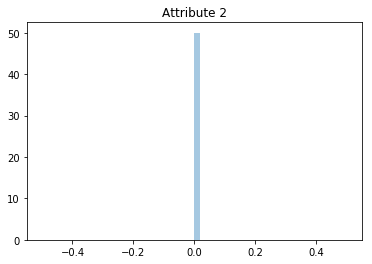

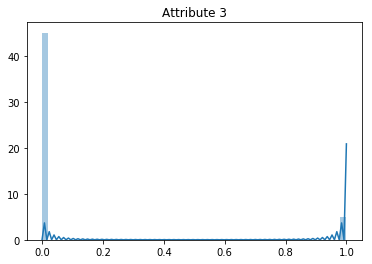

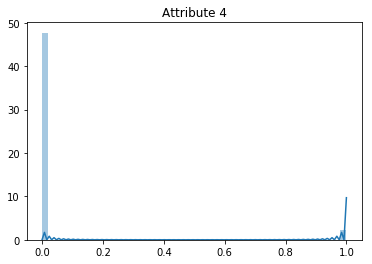

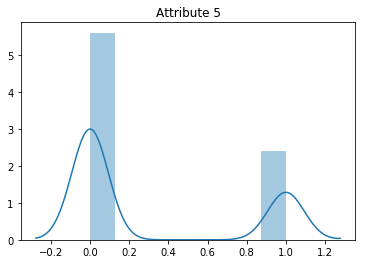

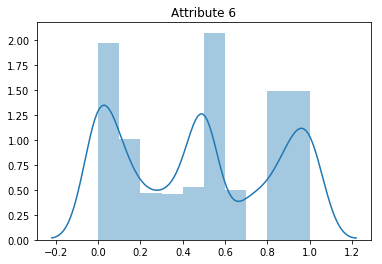

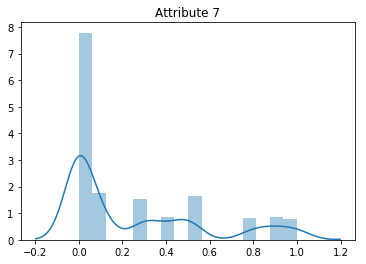

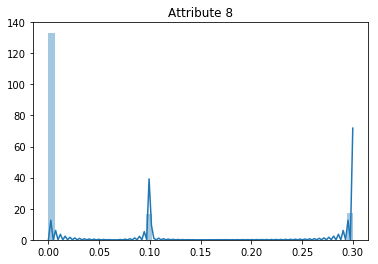

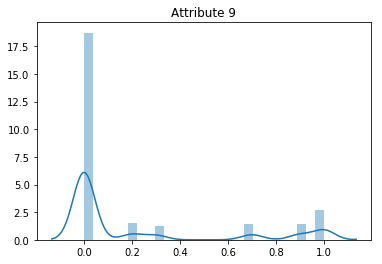

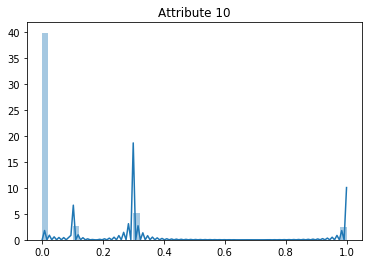

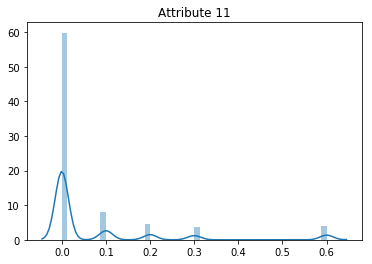

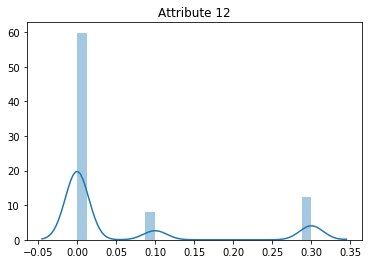

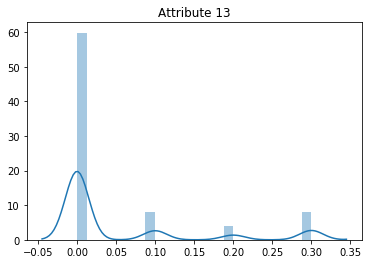

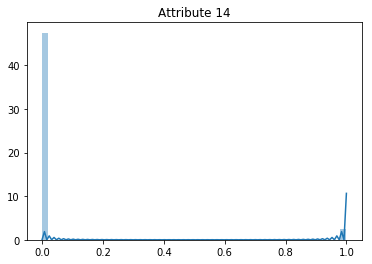

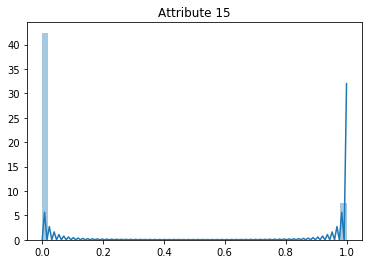

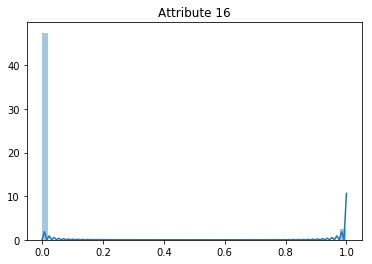

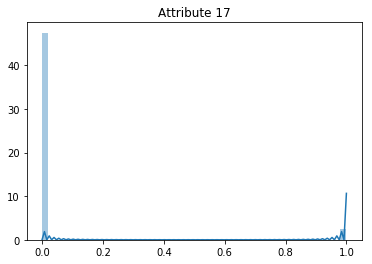

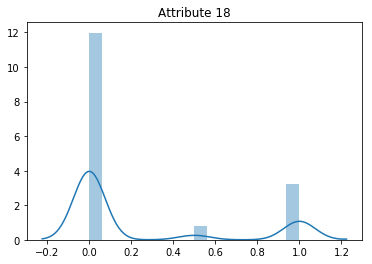

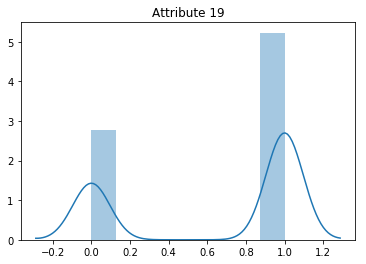

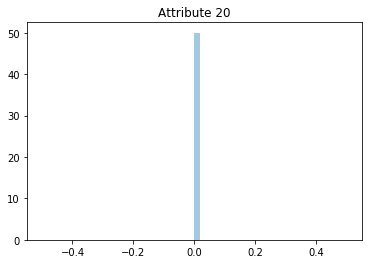

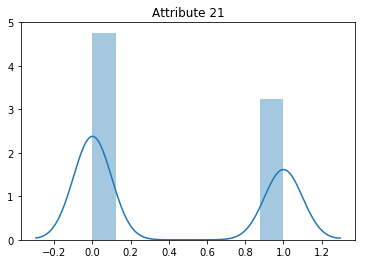

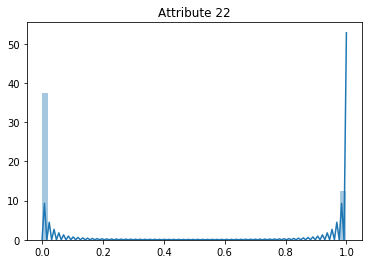

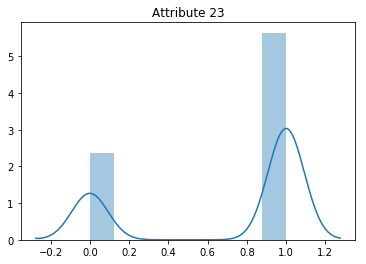

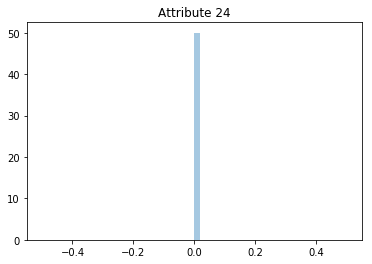

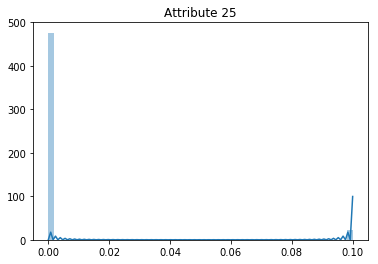

In [11]:
f(zero_val_list)

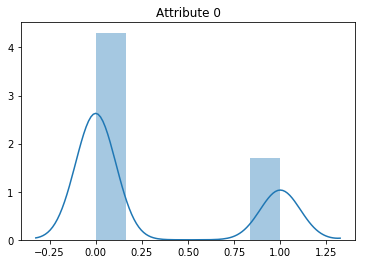

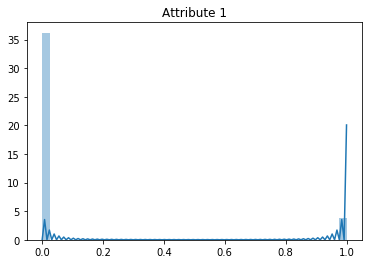

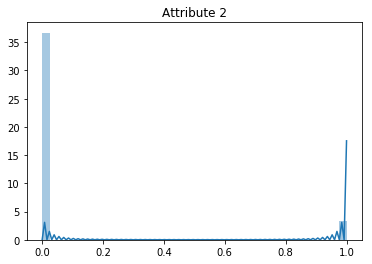

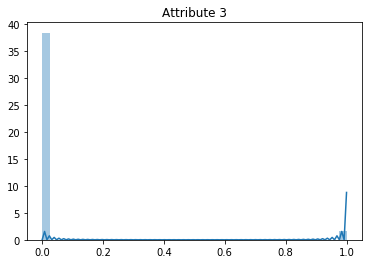

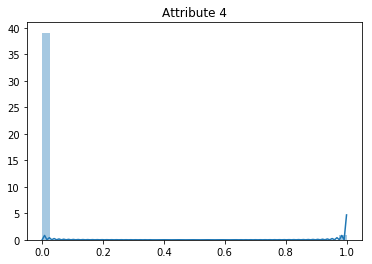

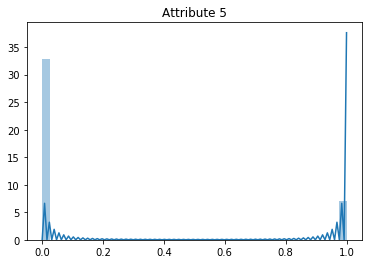

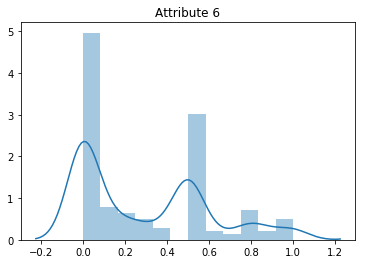

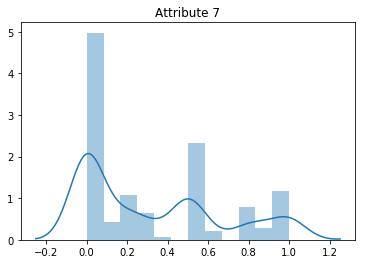

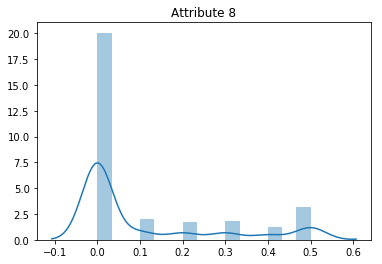

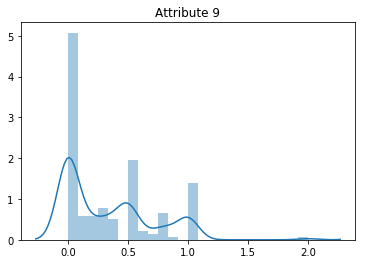

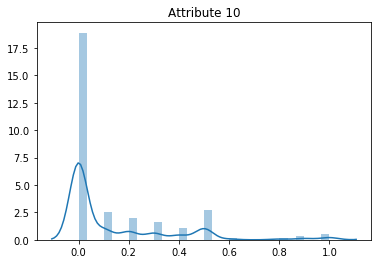

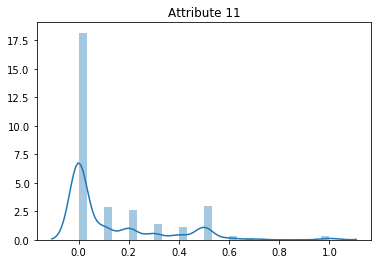

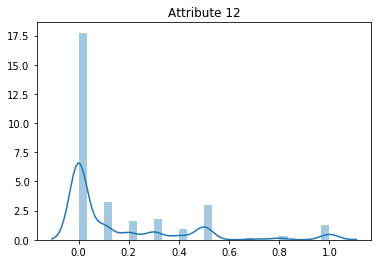

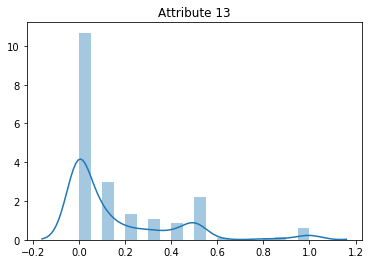

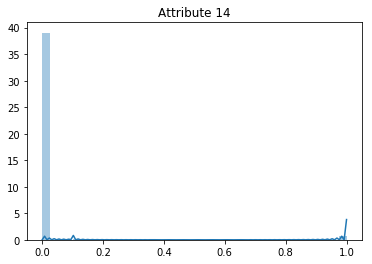

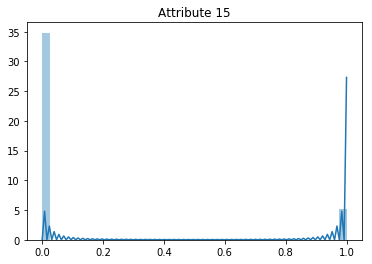

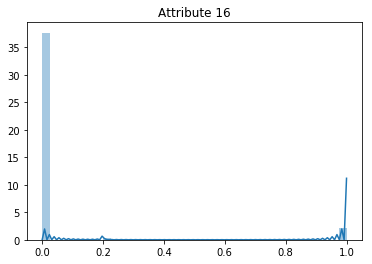

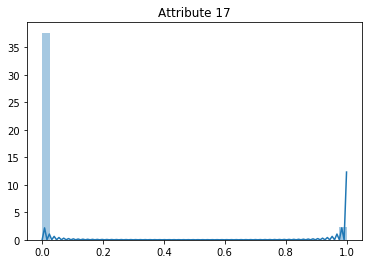

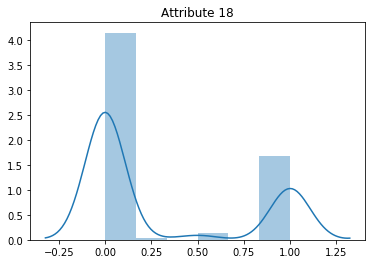

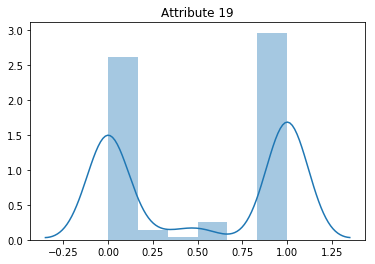

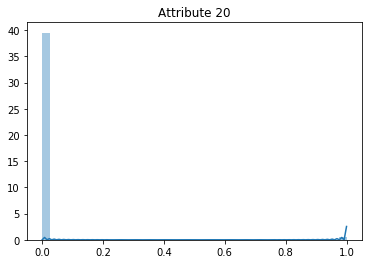

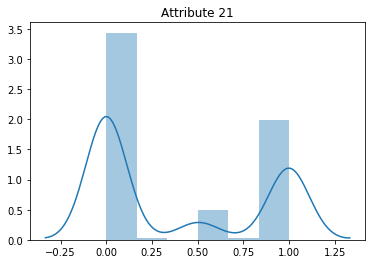

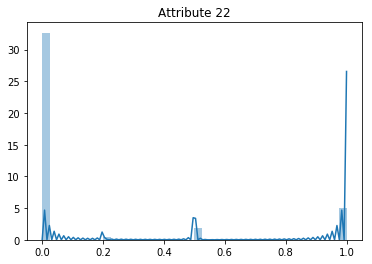

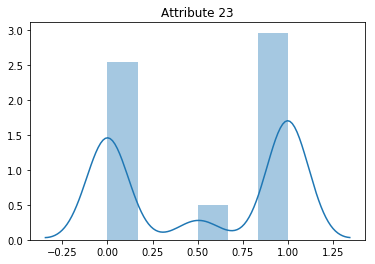

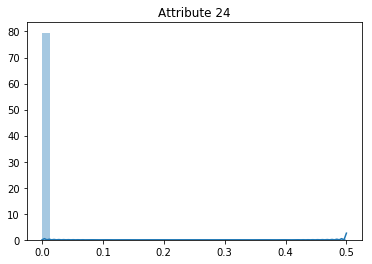

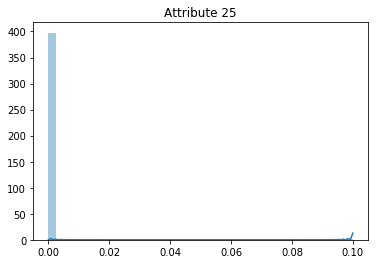

In [12]:
f(multi_val_list)

872
619
499


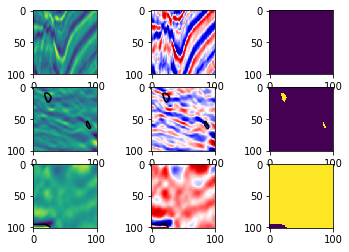

<Figure size 432x288 with 0 Axes>

In [39]:
#without prediction
num_imgs = 3
choice = np.random.choice( np.arange(len(img_list)) , num_imgs ) 
fig, ax = plt.subplots(3, 3)
plt.figure()
for idx,filename in enumerate(img_list[choice]):
    img = cv2.imread(filename , cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(filename.replace('images','masks'),cv2.IMREAD_GRAYSCALE)
    has_mask = mask.max() > 0
    ax[idx,0].imshow( img )
    if has_mask:
        ax[idx,0].contour( mask , colors='k' , levels=[0.5]  )
    ax[idx,1].imshow( img , cmap = 'seismic' )
    if has_mask:
        ax[idx,1].contour( mask , colors='k' , levels=[0.5]  )
    ax[idx,2].imshow( mask  )
    print(depth_dict[filename.split('/')[-1].split('.')[-2]])
plt.show()
